##### Uber Trips Analysis using Python

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sn
import os

In [2]:
os.chdir('C:\\Users\\Islam.Mammadov\\Desktop\\py') # Seting current working directory

In [3]:
data = pd.read_csv("uber.csv")   # Loading data
print(data.head())   # Printing first 5 rows

          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512


In [4]:
data["Date/Time"] = data["Date/Time"].map(pd.to_datetime)  # Converting Date/Time column to datetime

In [6]:
data["Day"] = data["Date/Time"].apply(lambda x: x.day)   #Creating "Day" column from Date/Time column
data["Weekday"] = data["Date/Time"].apply(lambda x: x.weekday())  #Creating "Day" column from Date/Time column
data["Hour"] = data["Date/Time"].apply(lambda x: x.hour)  # Adding Hour column
print(data.head()) # Print first 5 rows

            Date/Time      Lat      Lon    Base  Day  Weekday  Hour
0 2014-09-01 00:01:00  40.2201 -74.0021  B02512    1        0     0
1 2014-09-01 00:01:00  40.7500 -74.0027  B02512    1        0     0
2 2014-09-01 00:03:00  40.7559 -73.9864  B02512    1        0     0
3 2014-09-01 00:06:00  40.7450 -73.9889  B02512    1        0     0
4 2014-09-01 00:11:00  40.8145 -73.9444  B02512    1        0     0


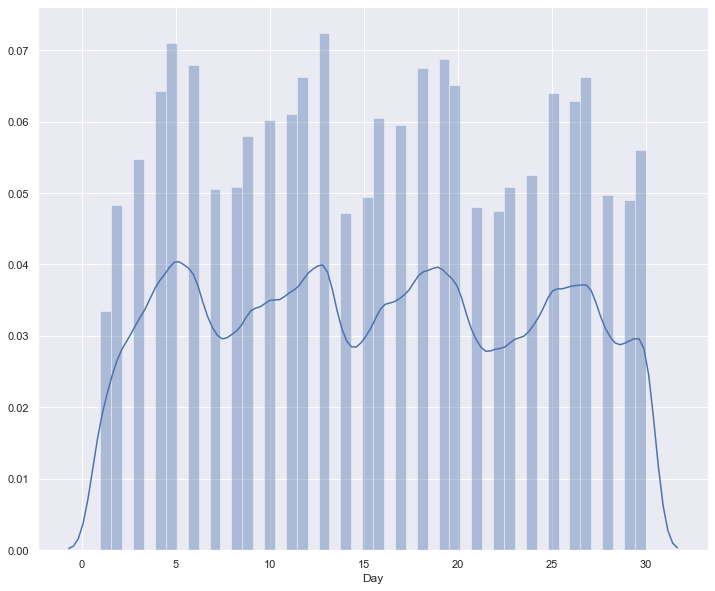

In [7]:
sn.set (rc = {'figure.figsize': (12,10)})
sn.distplot(data["Day"]) # Display distribution of Days

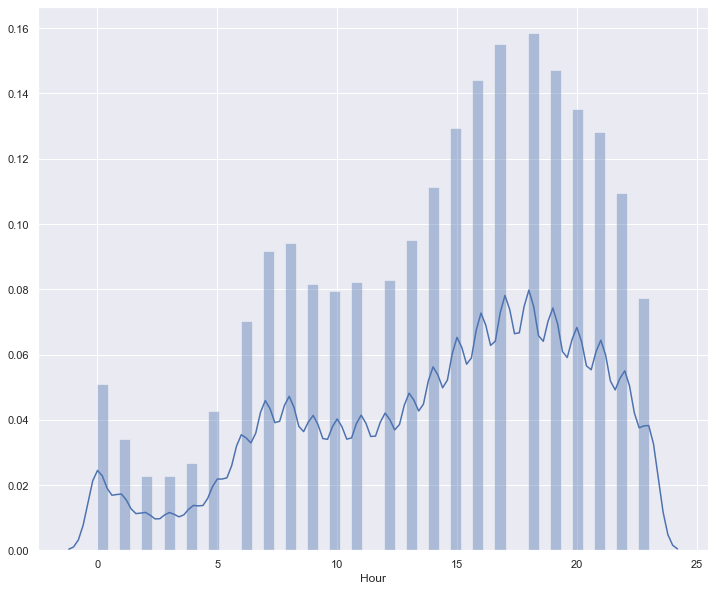

In [8]:
sn.distplot(data["Hour"]) # Distribution of Hours 

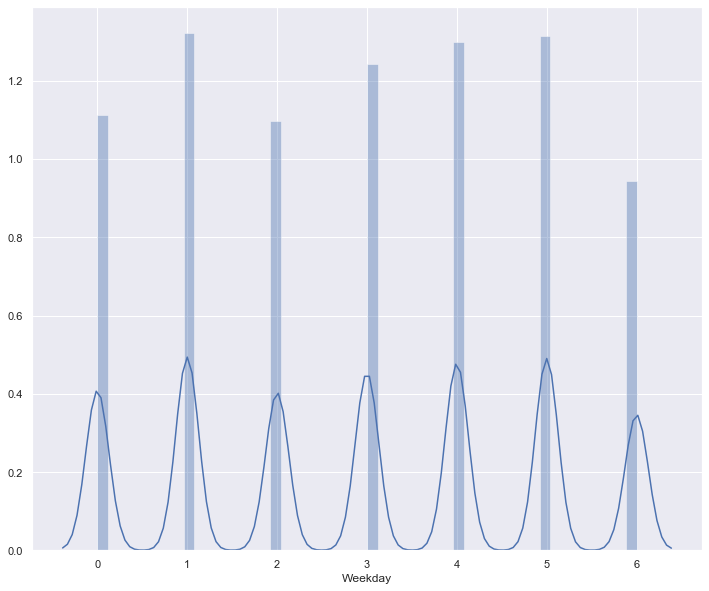

In [9]:
sn.distplot(data["Weekday"]) # Distribution of Weekday

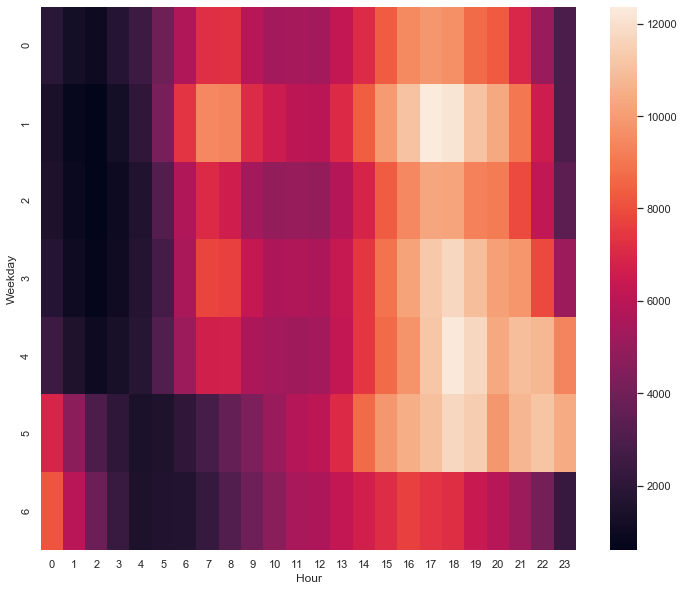

In [10]:
# Correlation of Weekday and Hour
df = data.groupby(["Weekday", "Hour"]).apply (lambda x: len(x))
df = df.unstack()
sn.heatmap(df, annot=False) # Plotting Heatmap

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


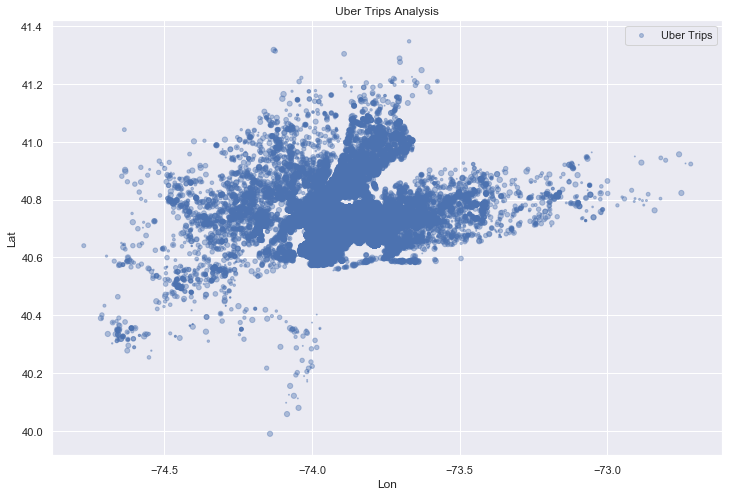

In [11]:
# Plotting longitude and latitude to show most active areas
data.plot(kind='scatter', x='Lon', y='Lat', alpha = 0.4, s=data['Day'], label='Uber Trips', figsize=(12,8), cmap=plt.get_cmap('jet'))
plt.title("Uber Trips Analysis")
plt.legend()
plt.show()